# Exploració de les dades

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

### Exercici 1

Descarrega el data set [Airlines Delay: Airline on-time statistics and delay causes](https://www.kaggle.com/giovamata/airlinedelaycauses) i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

### Exercici 2
Fes un informe complet del data set:.

- Resumeix estadísticament les columnes d’interès
- Troba quantes dades faltants hi ha per columna
- Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
- Taula de les aerolínies amb més endarreriments acumulats
- Quins són els vols més llargs? I els més endarrerits?
- Etc.

### Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

In [2]:
## Importar el dataset
raw_df = pd.read_csv("archive/DelayedFlights.csv", index_col = 0)

/Users/luis/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Variable descriptions

- Year: 1987-2008
- Month: 1-12
- DayofMonth: 1-31
- DayOfWeek: 1 (Monday) - 7 (Sunday)
- DepTime: actual departure time (local, hhmm)
- CRSDepTime: scheduled departure time (local, hhmm)
- ArrTime: actual arrival time (local, hhmm)
- CRSArrTime: scheduled arrival time (local, hhmm)
- UniqueCarrier: unique carrier code
- FlightNum: flight number
- TailNum: plane tail number 
- ActualElapsedTime: flygth time in minutes
- CRSElapsedTime: scheduled	flygth time in minutes
- AirTime: time on air in minutes
- ArrDelay:	arrival delay in minutes
- DepDelay: departure delay in minutes
- Origin: origin IATA airport code
- Dest:	destination IATA airport code
- Distance: distance in miles
- TaxiIn: taxi in time, in minutes `?????`
- TaxiOut: taxi out time, in minutes `?????`
- Cancelled: was the flight cancelled?
- CancellationCode:	[reason for cancellation](https://aspmhelp.faa.gov/index/Types_of_Delay.html) (A = carrier, B = weather, C = NAS, D = security)
- Diverted:	1 = yes, 0 = no ()
- CarrierDelay:	delayed time due to Carrier in minutes
- WeatherDelay:	delayed time due to Weather in minutes
- NASDelay: delayed time due to NAS in minutes
- SecurityDelay: delayed time due to security in minuts
- LateAircraftDelay: delayed time due to late aircraft in minutes

In [3]:
## Mostra
raw_df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1530485,2008,3,21,5,819.0,800,1340.0,1331,F9,676,N906FR,201.0,211.0,182.0,9.0,19.0,DEN,MCO,1545,10.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5953967,2008,11,7,5,1529.0,1520,1753.0,1800,WN,960,N605SW,84.0,100.0,75.0,-7.0,9.0,BNA,BWI,588,3.0,6.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3480983,2008,6,20,5,2256.0,2225,2341.0,2315,AA,443,N3CEAA,105.0,110.0,92.0,26.0,31.0,MIA,MSY,674,3.0,10.0,0,N,0,0.0,10.0,0.0,0.0,16.0
6849383,2008,12,23,2,1111.0,1015,1227.0,1135,MQ,4769,N723MQ,76.0,80.0,56.0,52.0,56.0,JFK,DCA,213,4.0,16.0,0,N,0,0.0,0.0,0.0,0.0,52.0
409694,2008,1,14,1,1801.0,1610,1949.0,1805,MQ,4277,N826AE,48.0,55.0,32.0,104.0,111.0,ORD,FWA,157,3.0,13.0,0,N,0,89.0,0.0,0.0,0.0,15.0
6882208,2008,12,23,2,1004.0,905,1146.0,1045,9E,2403,85809E,102.0,100.0,59.0,61.0,59.0,MCI,MSP,393,10.0,33.0,0,N,0,0.0,0.0,2.0,0.0,59.0
1728548,2008,3,8,6,2116.0,1955,18.0,2240,B6,581,N608JB,182.0,165.0,166.0,98.0,81.0,HPN,PBI,1057,4.0,12.0,0,N,0,37.0,0.0,17.0,0.0,44.0
341454,2008,1,29,2,1728.0,1715,2019.0,2006,EV,4764,N881AS,111.0,111.0,96.0,13.0,13.0,BMI,ATL,533,9.0,6.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4228972,2008,7,17,4,837.0,825,1002.0,1003,DL,120,N3751B,85.0,98.0,43.0,-1.0,12.0,JFK,BOS,187,16.0,26.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2875449,2008,5,19,1,1441.0,1425,1558.0,1550,AA,494,N560AA,77.0,85.0,57.0,8.0,16.0,MCI,ORD,403,12.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
## Columns and Data types
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [5]:
## Duplicates
raw_df.drop_duplicates(inplace = True)

In [6]:
## 2 duplicados
raw_df.shape

(1936756, 29)

In [7]:
## Null values %
raw_df.isna().mean()*100

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367109
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433044
CRSElapsedTime        0.010223
AirTime               0.433044
ArrDelay              0.433044
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367109
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588892
WeatherDelay         35.588892
NASDelay             35.588892
SecurityDelay        35.588892
LateAircraftDelay    35.588892
dtype: float64

#### Clean Data

In [8]:
## El percentage de null values a tot arreu menys a les columnes de Delay son molt baixos, per evitar problemes
## els eliminem
df = raw_df.dropna(subset=["ArrTime", "TailNum", "ActualElapsedTime", "CRSElapsedTime", "AirTime", 
                           "ArrDelay", "TaxiIn", "TaxiOut"])

## Fill null values in delays with 0 
df = df.fillna(0)
print (df.isna().sum())

## Convert floats to int
df[df.select_dtypes(include="float64").columns] = df.select_dtypes(include="float64").astype("int")

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [9]:
## DateTimes (No he aconseguit transformar-ho a datetime)
df["DepTime"] = df["DepTime"].apply(lambda x: str(x).zfill(4)).apply(lambda x: x[0:2] + ":" + x[2:]) 
df["CRSDepTime"] = df["CRSDepTime"].apply(lambda x: str(x).zfill(4)).apply(lambda x: x[0:2] + ":" + x[2:]) 
df["ArrTime"] = df["ArrTime"].apply(lambda x: str(x).zfill(4)).apply(lambda x: x[0:2] + ":" + x[2:]) 
df["CRSArrTime"] = df["CRSArrTime"].apply(lambda x: str(x).zfill(4)).apply(lambda x: x[0:2] + ":" + x[2:]) 

In [10]:
## Final Dataframe
df.to_csv("cleandf.csv")
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,20:03,19:55,22:11,22:25,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,N,0,0,0,0,0,0
1,2008,1,3,4,07:54,07:35,10:02,10:00,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,N,0,0,0,0,0,0
2,2008,1,3,4,06:28,06:20,08:04,07:50,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,N,0,0,0,0,0,0
4,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,N,0,2,0,0,0,32
5,2008,1,3,4,19:40,19:15,21:21,21:10,WN,378,N726SW,101,115,87,11,25,IND,JAX,688,4,10,0,N,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,12:50,12:20,16:17,15:52,DL,1621,N938DL,147,152,120,25,30,MSP,ATL,906,9,18,0,N,0,3,0,0,0,22
7009717,2008,12,13,6,06:57,06:00,09:04,07:49,DL,1631,N3743H,127,109,78,75,57,RIC,ATL,481,15,34,0,N,0,0,57,18,0,0
7009718,2008,12,13,6,10:07,08:47,11:49,10:10,DL,1631,N909DA,162,143,122,99,80,ATL,IAH,689,8,32,0,N,0,1,0,19,0,79
7009726,2008,12,13,6,12:51,12:40,14:46,14:37,DL,1639,N646DL,115,117,89,9,11,IAD,ATL,533,13,13,0,N,0,0,0,0,0,0


#### Studying the Dataframe

In [11]:
## Split into Numeric and Categoric values
data_num = df.select_dtypes(include = "int64")
data_cat = df.select_dtypes(exclude = "int64")

In [12]:
## Describe numeric
data_num.describe()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1928366.0,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1928366.0,1928366.0,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06
mean,2008.0,6.107862e+00,1.575205e+01,3.984999e+00,2.184294e+03,1.333059e+02,1.341977e+02,1.082772e+02,4.219977e+01,4.309160e+01,7.649492e+02,6.811384e+00,1.821732e+01,0.0,0.0,1.240741e+01,2.395751e+00,9.717668e+00,5.831103e-02,1.636464e+01
std,0.0,3.480754e+00,8.776560e+00,1.996052e+00,1.944449e+03,7.206015e+01,7.123347e+01,6.864268e+01,5.678449e+01,5.326580e+01,5.738864e+02,5.268056e+00,1.430839e+01,0.0,0.0,3.620425e+01,1.737622e+01,2.814335e+01,1.627459e+00,3.592083e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,6.110000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,3.423000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02,8.000000e+00,2.100000e+01,0.0,0.0,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,9.741000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


- Tots els vols son de 2008, podem eliminar aquesta columna
- A primera vista sembla que els vols estan repartits de manera regular tot l'any (mean = 6)
- De la mateixa manera, també estan repartits regularment dins del més i la setmana (mean = 15, 4)
- FlightNum no es una variable numèrica
- Els temps de vol tenen una variança molt gran, ja que depenen de la distància
- Cap vol ha estat cancelat o desviat. Podem eliminar les columnes
- Els delays estan esbiaixats ja que la gran majoria de vols no acumulen delays de cada tipus
- TaxiIn i TaxiOut els esborraré pk no sé exactament que són

In [13]:
## Drop Columns
data_num = data_num.drop(columns = ["Year", "Cancelled", "Diverted", "TaxiIn", "TaxiOut"])
data_cat = data_cat.drop(columns = "CancellationCode")

In [14]:
## Describe categ
data_cat.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,Origin,Dest
count,1928366,1928366,1928366,1928366,1928366,1928366,1928366,1928366
unique,1438,1193,1440,1361,20,5360,303,302
top,18:00,18:00,21:00,19:30,WN,N325SW,ATL,ORD
freq,3176,13867,2981,9148,376201,961,131213,108265


- La hora més frequent de sortida son las 18:00, la d'arribada las 19:30
- WN és la aerolinea més utilitzada, y ATL y ORD els aeroports més transitats

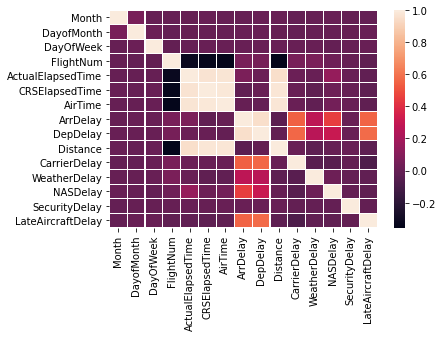

In [15]:
#Correlation Matrix
sns.heatmap(data_num.corr(), linewidths=.2)
plt.show()

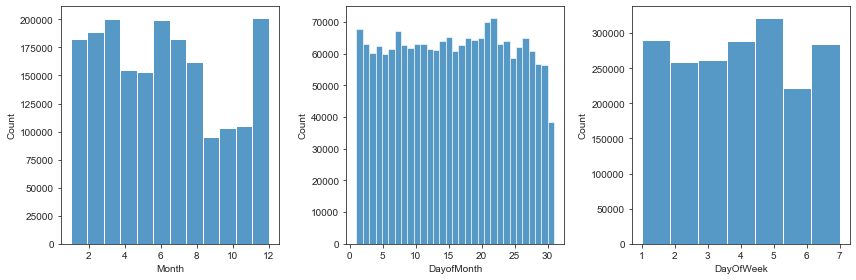

In [16]:
## Histograms
sns.set_style("ticks")

fig1, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(data_num["Month"], bins=12, ax = axes[0])
sns.histplot(data_num["DayofMonth"], bins=31, ax = axes[1])
sns.histplot(data_num["DayOfWeek"], bins=7, ax = axes[2])

plt.tight_layout()
plt.show()

- Podem veure com els vols augmenten a les vacences d'estiu i d'hivern.
- Efectivament els vols dins d'un mateix mes estan mes o menys repertits. Però si ens fixem hi ha pics periòdics corresponents al cap de setmana.
- Els divendres hi ha un pic en el nombre de vols.

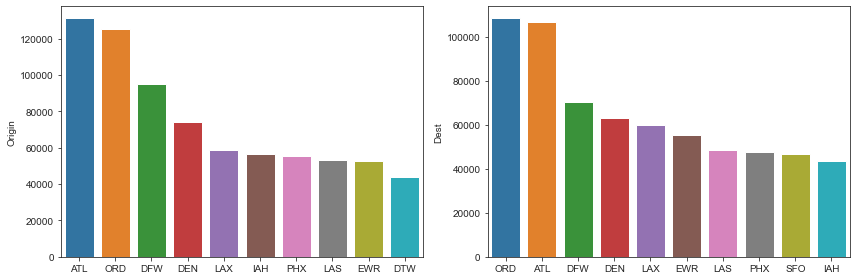

In [17]:
## BarPlots
sns.set_style("ticks")

fig1, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x = data_cat["Origin"].value_counts().index[0:10], y = data_cat["Origin"].value_counts()[0:10], ax = axes[0])
sns.barplot(x = data_cat["Dest"].value_counts().index[0:10], y = data_cat["Dest"].value_counts()[0:10], ax = axes[1])

plt.tight_layout()
plt.show()

- Els aeroports de Atlanta i Chicago son de llarg els més transitats, seguits per Dallas

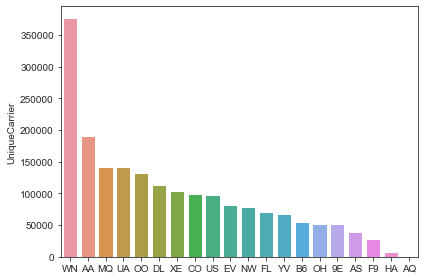

In [18]:
## BarPlots
sns.set_style("ticks")

fig1 = plt.figsize=(12, 4)
sns.barplot(x = data_cat["UniqueCarrier"].value_counts().index, y = data_cat["UniqueCarrier"].value_counts())

plt.tight_layout()
plt.show()

- SouthWest Airlines es la aerolinea més demandada

<AxesSubplot:xlabel='Distance', ylabel='ArrDelay'>

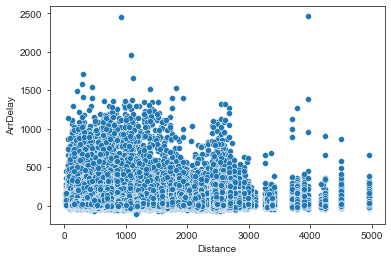

In [19]:
## Scatter Plot
sns.scatterplot(x = df["Distance"], y = df["ArrDelay"])

- No hi ha relació entre la distancia i el delay

In [20]:
## Creem la columna delay categorica i velocitat mitja
## Considerarem delay important un retras de més de 20 min
## ja que el 85% dels vols tenen delay
data_cat["delay"] = data_num["ArrDelay"].apply(lambda x: 1 if x > 15 else 0)
data_num["Velocity"] = data_num["Distance"] / data_num["AirTime"] #(miles / min)

In [21]:
## Quina compañia acumula més delay? (%)
delay = round (data_cat.groupby("UniqueCarrier")[["delay"]].mean(), 2) * 100
delay.sort_values(by = "delay").head(10)

,delay
UniqueCarrier,
AQ,43.0
WN,52.0
F9,54.0
HA,55.0
CO,58.0
US,59.0
AS,60.0
DL,62.0
FL,64.0


- La companyia "AQ" només té retrassos en un 43% dels seus vols, tot i que com em vist abans és una aerolinea petita amb pocs vols
- La companyia "YV" acumula retrassos en el 74% dels seus vols, tot i no ser una companyia gaire gran
- "WN", la aerolinea més demandada, va en segona posició amb retrassos només al 52% dels seus vols

In [22]:
## tornem a juntar Data
df = data_num.join(data_cat)
display(df)

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Velocity,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,Origin,Dest,delay
0,1,3,4,335,128,150,116,-14,8,810,0,0,0,0,0,6.982759,20:03,19:55,22:11,22:25,WN,N712SW,IAD,TPA,0
1,1,3,4,3231,128,145,113,2,19,810,0,0,0,0,0,7.168142,07:54,07:35,10:02,10:00,WN,N772SW,IAD,TPA,0
2,1,3,4,448,96,90,76,14,8,515,0,0,0,0,0,6.776316,06:28,06:20,08:04,07:50,WN,N428WN,IND,BWI,0
4,1,3,4,3920,90,90,77,34,34,515,2,0,0,0,32,6.688312,18:29,17:55,19:59,19:25,WN,N464WN,IND,BWI,1
5,1,3,4,378,101,115,87,11,25,688,0,0,0,0,0,7.908046,19:40,19:15,21:21,21:10,WN,N726SW,IND,JAX,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,1621,147,152,120,25,30,906,3,0,0,0,22,7.550000,12:50,12:20,16:17,15:52,DL,N938DL,MSP,ATL,1
7009717,12,13,6,1631,127,109,78,75,57,481,0,57,18,0,0,6.166667,06:57,06:00,09:04,07:49,DL,N3743H,RIC,ATL,1
7009718,12,13,6,1631,162,143,122,99,80,689,1,0,19,0,79,5.647541,10:07,08:47,11:49,10:10,DL,N909DA,ATL,IAH,1
7009726,12,13,6,1639,115,117,89,9,11,533,0,0,0,0,0,5.988764,12:51,12:40,14:46,14:37,DL,N646DL,IAD,ATL,0


In [23]:
## Creem la columna de viatje, per unir dest amb Origin
df["Vol"] = df["Origin"] + "-" + df["Dest"]
## I filtrem per distancia
temp_df = df[["Vol", "Distance", "ArrDelay"]]
display(temp_df.groupby("Vol").mean().sort_values("Distance", ascending = False).head())

,Distance,ArrDelay
Vol,,
EWR-HNL,4962.0,26.875472
HNL-EWR,4962.0,57.070175
HNL-ATL,4502.0,41.443709
ATL-HNL,4502.0,33.346405
ORD-HNL,4243.0,36.956311


- Els vols més llargs son els de Newark(EWR) a Honolulú(HNL) i viceversa, seguits per Atlanta(ATL) a Honolulú(HNL)

In [24]:
## Filtrem per delay amb vols frequents
temp_df = df[["Vol", "Distance", "ArrDelay"]]
freq = temp_df.groupby("Vol")["Vol"].transform("count") > 10
display(temp_df[freq].groupby("Vol").mean().sort_values("ArrDelay", ascending = False).head())

,Distance,ArrDelay
Vol,,
EGE-MIA,1811.0,207.071429
HNL-MSP,3972.0,150.411765
GRR-MCO,1023.0,136.105263
EGE-MSP,788.0,128.852941
GUC-DFW,678.0,126.113208


- De mitja, la trajectòria que acumula més retrassos és de llarg Vail(EGE) - Miami(MIA)
- Si estudiem els delays de les trajectòries per separat és fàcil veure que aquets valors tan alts son a cause de uns poc vols de la línia que acumulen retrassos estratosfèrics (Outliers). Estaria bé eliminar-los més endavant. 

In [25]:
## to CSV
df.to_csv("final_df.csv", index = False)